In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chathuryapampana","key":"60fe8338ffe396d9b267e5ae72aa60c9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!pip install kaggle



In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer






Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 80% 52.0M/65.2M [00:00<00:00, 100MB/s]
100% 65.2M/65.2M [00:00<00:00, 123MB/s]


In [ ]:
from google.colab import files
import zipfile
import os

# Upload the zip file to Colab
uploaded = files.upload()

# Get the filename of the uploaded file
zip_file_name = list(uploaded.keys())[0]

# Set the path to the uploaded file
zip_file_path = zip_file_name

# Set the extraction folder path
extraction_folder = '/content/extracted_data'  # Extract to a folder within Colab

# Create the extraction folder if it doesn't exist
os.makedirs(extraction_folder, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_folder)

print(f"File '{zip_file_name}' extracted to '{extraction_folder}'")

Saving archive (6).zip to archive (6).zip
File 'archive (6).zip' extracted to '/content/extracted_data'


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set the path to the directory containing your images
data_directory = '/content/extracted_data'  # Change this if your images are in a subfolder

# Parameters for image processing
img_height, img_width = 48, 48  # Adjust this based on your specific dataset
batch_size = 32


In [ ]:
# Create an ImageDataGenerator for loading images
datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values between 0 and 1

# Load images from the directory
train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=(img_height, img_width),
    color_mode='grayscale',  # Change to 'rgb' if your images are in color
    class_mode='categorical',  # Use 'binary' if you have only two classes
    batch_size=batch_size,
    shuffle=True
)


Found 35887 images belonging to 2 classes.


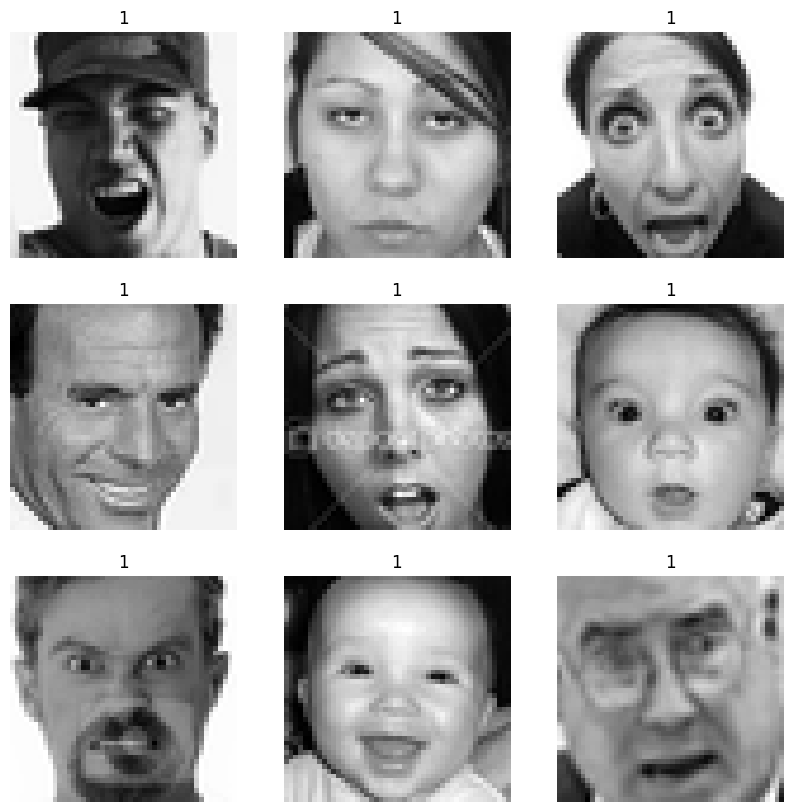

In [ ]:
# Function to display images
def display_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i], cmap='gray')  # Use 'gray' for grayscale images
        plt.title(np.argmax(labels[i]))  # Display class label
        plt.axis("off")

# Get a batch of images and labels
images, labels = next(train_generator)
display_images(images, labels)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
model.fit(train_generator, epochs=10)  # Adjust epochs as needed


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1122/1122 ━━━━━━━━━━━━━━━━━━━━ 130s 113ms/step - accuracy: 0.7986 - loss: 0.5163
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 141s 113ms/step - accuracy: 0.7996 - loss: 0.5051
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 139s 110ms/step - accuracy: 0.7974 - loss: 0.5070
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.7960 - loss: 0.5069
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 143s 111ms/step - accuracy: 0.7999 - loss: 0.5023
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 140s 109ms/step - accuracy: 0.8003 - loss: 0.5011
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 122s 109ms/step - accuracy: 0.8038 - loss: 0.4961
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 123s 109ms/step - accuracy: 0.7986 - loss: 0.5029
Epoch 9/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 141s 109ms/step - accuracy: 0.7960 - loss: 0.5063
Epoch 10/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 151s 117ms/step - accuracy: 0.8001 - loss: 0.5007


In [ ]:
train_loss, train_accuracy = model.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy:.2f}")

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 44s 39ms/step - accuracy: 0.8015 - loss: 0.4983
Training Accuracy: 0.80


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


Found 35887 images belonging to 2 classes.
   5/1122 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.0000e+00 - loss: 1.6373

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1122/1122 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.4789 - loss: 0.9568
Test Loss: 0.5005, Test Accuracy: 0.80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


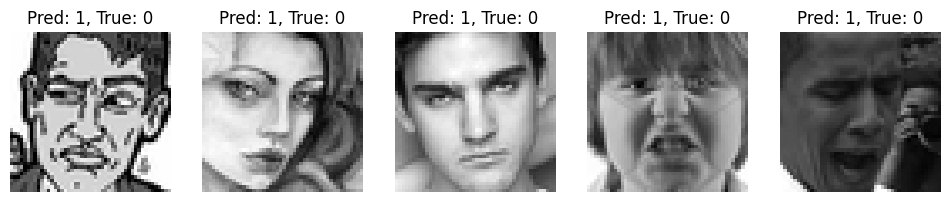

In [ ]:
# Step 1: Set the path for the test data
test_data_directory = '/content/extracted_data'  # Adjust this path to your test data location

# Step 2: Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale the test data

# Step 3: Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_data_directory,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False  # Do not shuffle for evaluation
)

# Step 4: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}")

# Step 5: Visualize some test predictions
# Get a batch of test images and their labels
images, labels = next(test_generator)

# Make predictions
predictions = model.predict(images)

# Display the first 5 images with their predicted and true labels
def display_test_predictions(images, predictions, true_labels):
    plt.figure(figsize=(12, 6))
    for i in range(5):  # Display first 5 images
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        predicted_class = np.argmax(predictions[i])
        true_class = np.argmax(true_labels[i])
        plt.title(f"Pred: {predicted_class}, True: {true_class}")
        plt.axis("off")

display_test_predictions(images, predictions, labels)


In [ ]:
# Save the trained model
model.save('emotion_detection_model.h5')


1122/1122 ━━━━━━━━━━━━━━━━━━━━ 49s 43ms/step
Classification Report:
              precision    recall  f1-score   support

        test       0.00      0.00      0.00      7178
       train       0.80      1.00      0.89     28709

    accuracy                           0.80     35887
   macro avg       0.40      0.50      0.44     35887
weighted avg       0.64      0.80      0.71     35887



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


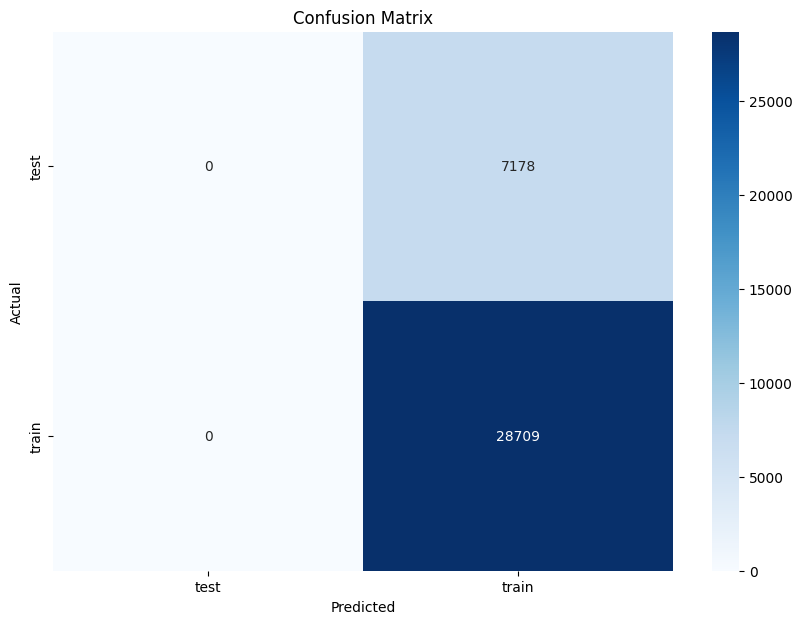

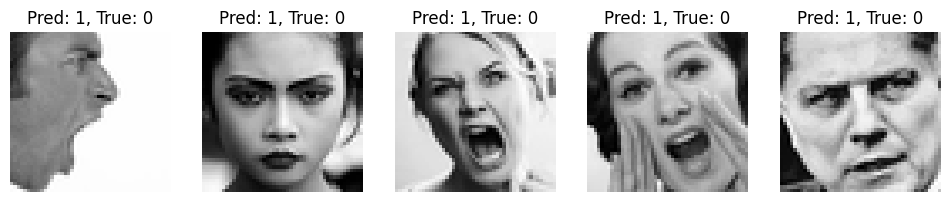

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



# Step 5: Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class indices
true_classes = test_generator.classes  # Get true class indices

# Step 6: Calculate and display performance metrics
print("Classification Report:")
target_names = list(test_generator.class_indices.keys())
print(classification_report(true_classes, predicted_classes, target_names=target_names))

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Step 8: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Visualize some test predictions
images, labels = next(test_generator)  # Get a batch of test images and their labels

# Display the first 5 images with their predicted and true labels
def display_test_predictions(images, predictions, true_labels):
    plt.figure(figsize=(12, 6))
    for i in range(5):  # Display first 5 images
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        predicted_class = np.argmax(predictions[i])
        true_class = np.argmax(true_labels[i])
        plt.title(f"Pred: {predicted_class}, True: {true_class}")
        plt.axis("off")

display_test_predictions(images, predictions, labels)


In [ ]:
# Check the first few predictions and their true labels
sample_size = 10
sample_images, sample_labels = next(test_generator)

sample_predictions = model.predict(sample_images)
predicted_classes = np.argmax(sample_predictions, axis=1)
true_classes = np.argmax(sample_labels, axis=1)

for i in range(sample_size):
    print(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0
Predicted: 1, True: 0


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(true_classes), y=true_classes)
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# ... (your existing code) ...

# Define num_classes here
num_classes = 7  # Replace with the actual number of classes in your dataset

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base model layers

# Add custom layers on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes as per your data


In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base model layers

# Add custom layers on top
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Adjust num_classes as per your data


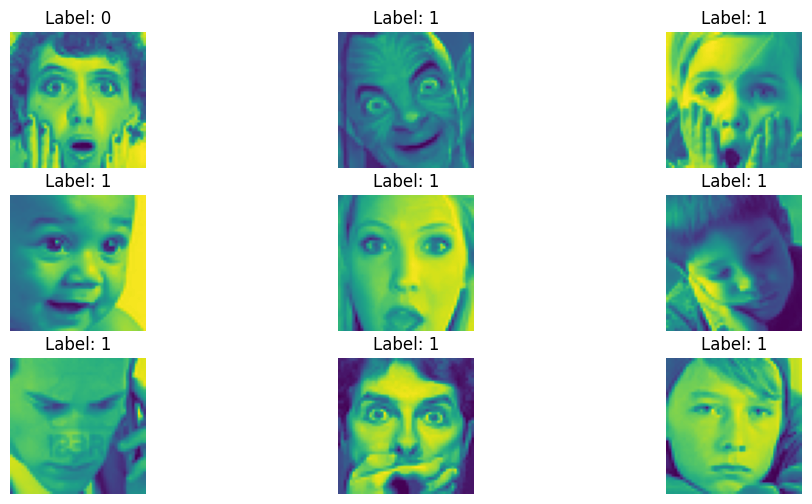

In [ ]:
def visualize_data(generator):
    images, labels = next(generator)
    plt.figure(figsize=(12, 6))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {np.argmax(labels[i])}")
        plt.axis("off")
    plt.show()

visualize_data(train_generator)  # Use your train generator


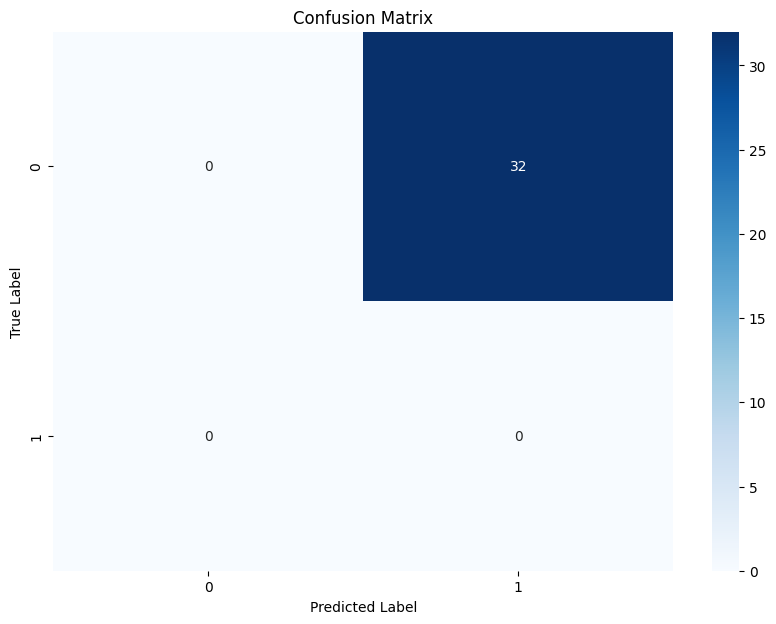

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**CNN MODEL**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Set paths
train_data_directory = '/content/extracted_data'
validation_data_directory = '/content/extracted_data'

# Image properties
img_height, img_width = 48, 48  # Adjust based on your dataset
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_directory,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_directory,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size
)


Found 35887 images belonging to 2 classes.
Found 35887 images belonging to 2 classes.


**Build the CNN Model**

In [ ]:
def build_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # num_classes = number of emotion categories

    return model

# Build and compile the model
num_classes = len(train_generator.class_indices)  # Number of classes based on the training data
input_shape = (img_height, img_width, 1)  # Grayscale images
model = build_cnn_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Train CNN Model**

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1122/1122 ━━━━━━━━━━━━━━━━━━━━ 191s 168ms/step - accuracy: 0.7973 - loss: 0.5113 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 2/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 186s 166ms/step - accuracy: 0.8005 - loss: 0.5011 - val_accuracy: 0.8000 - val_loss: 0.5012
Epoch 3/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 186s 166ms/step - accuracy: 0.8023 - loss: 0.4984 - val_accuracy: 0.8000 - val_loss: 0.5007
Epoch 4/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 185s 165ms/step - accuracy: 0.8009 - loss: 0.5002 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 5/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 187s 167ms/step - accuracy: 0.8002 - loss: 0.5008 - val_accuracy: 0.8000 - val_loss: 0.5005
Epoch 6/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 200s 165ms/step - accuracy: 0.8020 - loss: 0.4982 - val_accuracy: 0.8000 - val_loss: 0.5013
Epoch 7/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 204s 167ms/step - accuracy: 0.8001 - loss: 0.5008 - val_accuracy: 0.8000 - val_loss: 0.5007
Epoch 8/10
1122/1122 ━━━━━━━━━━━━━━━━━━━━ 255s 214ms/step - accuracy: 0.8

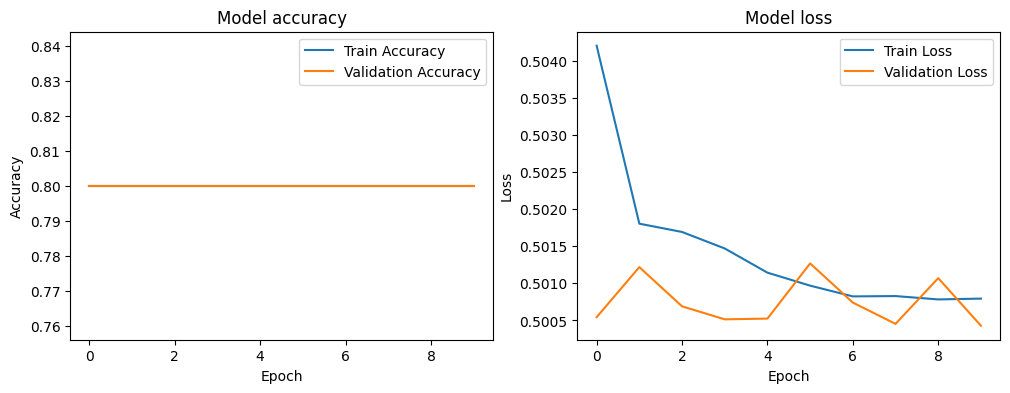

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


**Content Generation with GANs**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Function to build the generator and discriminator as previously defined...

# Function to compile and train the GAN
def compile_and_train_gan(generator, discriminator, z_dim, img_shape, epochs=10000, batch_size=128):
    cross_entropy = tf.keras.losses.BinaryCrossentropy()
    generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
    discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

    discriminator.compile(loss=cross_entropy, optimizer=discriminator_optimizer, metrics=['accuracy'])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(z_dim,))
    generated_img = generator(gan_input)
    gan_output = discriminator(generated_img)
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(loss=cross_entropy, optimizer=generator_optimizer)

    # Load Dataset
    (X_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
    X_train = (X_train / 127.5) - 1.0
    X_train = np.expand_dims(X_train, axis=-1)

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_imgs = X_train[idx]
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        fake_imgs = generator.predict(noise)

        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss}]")

        # Save generated images every 500 epochs
        if epoch % 500 == 0:
            save_generated_images(epoch, generator, z_dim)

# Function to save generated images
def save_generated_images(epoch, generator, z_dim, examples=5, dim=(1, 5), figsize=(10, 2)):
    noise = np.random.normal(0, 1, (examples, z_dim))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5

    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()

# Execute Training
z_dim = 100
img_shape = (28, 28, 1)
generator = build_generator(z_dim)
discriminator = build_discriminator(img_shape)
compile_and_train_gan(generator, discriminator, z_dim, img_shape, epochs=5000, batch_size=128)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
0 [D loss: 1.0257878303527832, acc.: 26.17%] [G loss: [array(0.8696835, dtype=float32), array(0.8696835, dtype=float32), array(0.5078125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━

**Mointor loss and accuries**

In [ ]:
import os
data_dir = '/content/extracted_data'  # Adjust to your actual path
print(os.listdir(data_dir))


['test', 'train']


In [ ]:
import os

data_dir = '/content/extracted_data'  # Adjust to your actual dataset path
# List the contents of the directory
print(os.listdir(data_dir))


['test', 'train']


In [ ]:
import os

data_dir = '/content/extracted_data'  # Make sure this path is correct
# List the contents of the directory
try:
    files = os.listdir(data_dir)
    print("Files in directory:", files)
except Exception as e:
    print(f"Error accessing directory: {e}")


Files in directory: ['test', 'train']


In [ ]:
# Save the generator and discriminator models
generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the models
loaded_generator = load_model('generator_model.h5')
loaded_discriminator = load_model('discriminator_model.h5')


In [ ]:
!pip install tensorflow keras numpy scipy




**Load and Preprocess the Dataset**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load datasets
train_df = pd.read_csv('/content/test.csv')
test_df = pd.read_csv('/content/training.csv')
validation_df = pd.read_csv('/content/validation.csv')

# Combine all data for tokenization
all_data = pd.concat([train_df, test_df, validation_df])

# Preprocessing the text data
max_words = 10000  # Maximum number of words in tokenizer
max_seq_len = 100  # Maximum sequence length

# Tokenize the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_data['text'])

# Convert text to sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['text']), maxlen=max_seq_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=max_seq_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(validation_df['text']), maxlen=max_seq_len)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])
y_val = label_encoder.transform(validation_df['label'])


**Implement RNN for Content Generation**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# RNN Model
embedding_dim = 128
num_classes = len(label_encoder.classes_)

model_rnn = Sequential()
model_rnn.add(Embedding(max_words, embedding_dim, input_length=max_seq_len))
model_rnn.add(LSTM(128, return_sequences=False))
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Dense(num_classes, activation='softmax'))

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.3350 - loss: 1.6318 - val_accuracy: 0.3520 - val_loss: 1.5747
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 244ms/step - accuracy: 0.3768 - loss: 1.4970 - val_accuracy: 0.3120 - val_loss: 1.5592
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 243ms/step - accuracy: 0.6092 - loss: 1.0372 - val_accuracy: 0.5135 - val_loss: 1.3485
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 278ms/step - accuracy: 0.8255 - loss: 0.4777 - val_accuracy: 0.5850 - val_loss: 1.3732
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 258ms/step - accuracy: 0.9276 - loss: 0.2500 - val_accuracy: 0.6090 - val_loss: 1.4562
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - accuracy: 0.9764 - loss: 0.0833 - val_accuracy: 0.6180 - val_loss: 1.7941
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - accuracy: 0.9849 - loss: 0.0536 - val_accuracy: 0.6490 - val_loss: 1.6749
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - accuracy: 0.9943 - loss: 0.0216 - val_accu

**Metric performance**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on the test set
test_loss, test_accuracy = model_rnn.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions
y_pred = model_rnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert numeric labels to string labels for the classification report
class_names = [str(i) for i in label_encoder.classes_]

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Overall Test Accuracy: {overall_accuracy}")


500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.6428 - loss: 1.6615
Test Loss: 1.6295762062072754
Test Accuracy: 0.6489375233650208
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.75      0.70      4666
           1       0.73      0.74      0.73      5362
           2       0.47      0.41      0.44      1304
           3       0.59      0.57      0.58      2159
           4       0.59      0.53      0.56      1937
           5       0.47      0.25      0.32       572

    accuracy                           0.65     16000
   macro avg       0.58      0.54      0.56     16000
weighted avg       0.64      0.65      0.64     16000

Overall Test Accuracy: 0.6489375


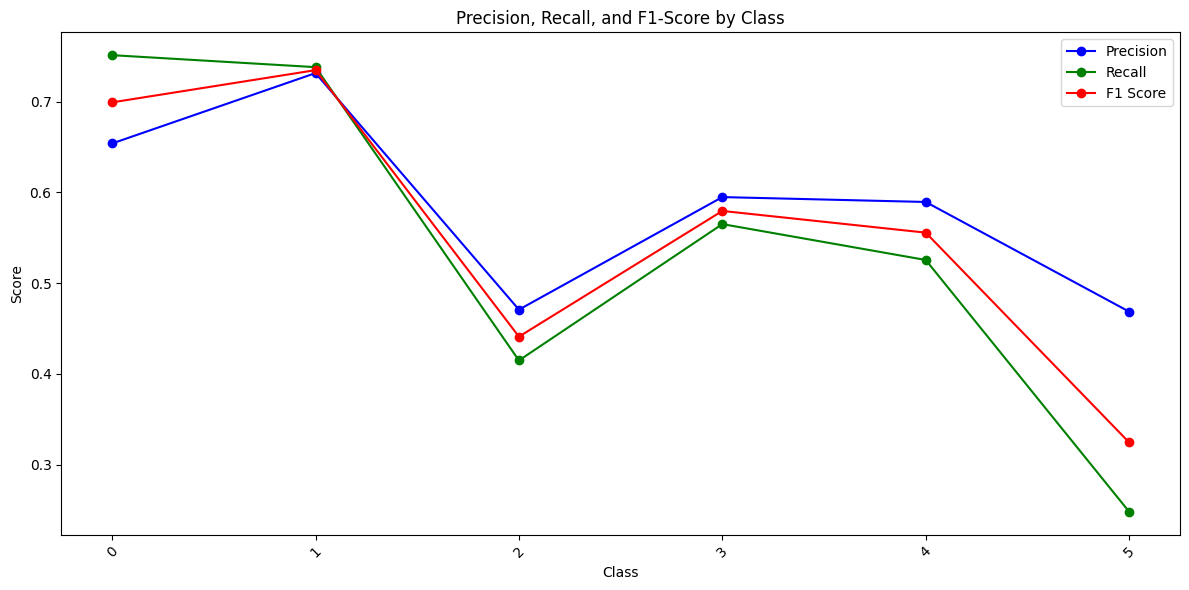

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Plot precision, recall, and F1-score as line graphs
plt.figure(figsize=(12, 6))

# Line plot for Precision
plt.plot(report_df.index, report_df['precision'], marker='o', label='Precision', color='b')

# Line plot for Recall
plt.plot(report_df.index, report_df['recall'], marker='o', label='Recall', color='g')

# Line plot for F1-Score
plt.plot(report_df.index, report_df['f1-score'], marker='o', label='F1 Score', color='r')

# Add labels and title
plt.title('Precision, Recall, and F1-Score by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.legend()
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Confusion Metric**

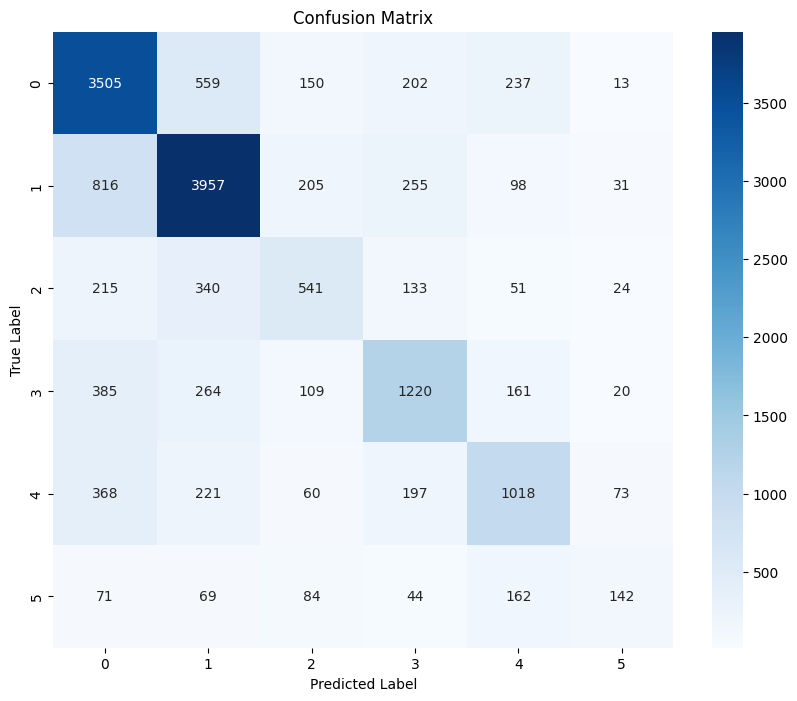

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate confusion matrix
# Convert y_pred to discrete class labels using argmax
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

** BERT Model for Text Generation**

In [ ]:
!pip install transformers
from transformers import create_optimizer
from transformers import TFBertForSequenceClassification, BertTokenizer
import tensorflow as tf

# Load BERT model and tokenizer
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the training data
# Assuming you have a variable named 'train_texts' containing the training text data
train_data = pd.read_csv('training.csv')
train_texts = train_data['text'].tolist()
train_encodings = tokenizer(train_texts[:len(y_train)], truncation=True, padding=True)
val_texts = train_data['text'].tolist()
val_encodings = tokenizer(val_texts[:len(y_val)], truncation=True, padding=True)

# Create TensorFlow datasets for BERT
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train.astype(int))).shuffle(100).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_val.astype(int))).batch(32)

# instead of tf.keras.optimizers.Adam
num_train_steps = len(train_dataset) * 3  # 3 epochs
optimizer, schedule = create_optimizer( # Call the imported create_optimizer function
    init_lr=5e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps,
)

# Compile and train the BERT model
# Use the optimizer from create_optimizer
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # Explicitly set the loss function
    metrics=['accuracy']
)

bert_model.fit(train_dataset, validation_data=val_dataset, epochs=3)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Epoch 1/3
63/63 [==============================] - 2290s 36s/step - loss: 1.5910 - accuracy: 0.3360 - val_loss: 1.5800 - val_accuracy: 0.3520
Epoch 2/3
63/63 [==============================] - 2159s 34s/step - loss: 1.5630 - accuracy: 0.3540 - val_loss: 1.5806 - val_accuracy: 0.3520
Epoch 3/3
63/63 [==============================] - 2216s 35s/step - loss: 1.5485 - accuracy: 0.3445 - val_loss: 1.5856 - val_accuracy: 0.3460


In [ ]:
!pip install seaborn matplotlib pandas numpy scikit-learn
